In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train['product_id'] = train['product_id'].astype('object')
print(train['product_id'].dtype)
print(train['product_id'].describe())
print()

test['product_id'] = test['product_id'].astype('object')
print(test['product_id'].dtype)
print(test['product_id'].describe())

object
count      416962
unique      32734
top       5892179
freq         1063
Name: product_id, dtype: int64

object
count        5164
unique       2691
top       5700037
freq           28
Name: product_id, dtype: int64


In [4]:
train['user_id'] = train['user_id'].astype('object')
print(train['user_id'].dtype)
print(train['user_id'].describe())
print()

test['user_id'] = test['user_id'].astype('object')
print(test['user_id'].dtype)
print(test['user_id'].describe())

object
count     416962
unique     53975
top         6607
freq        2355
Name: user_id, dtype: int64

object
count      5164
unique      558
top       54193
freq        141
Name: user_id, dtype: int64


In [5]:
train.fillna(value={'brand':'null'},inplace=True)
print(train['brand'].isnull().sum())

test.fillna(value={'brand':'null'},inplace=True)
print(test['brand'].isnull().sum())

0
0


In [6]:
import datetime

index_len = len(train.index)
date_list = []

for i in range(index_len):
    date_str = train['event_time'][i]
    date_list.append(datetime.datetime.strptime(date_str[0:19],'%Y-%m-%d %H:%M:%S'))

train['event_time'] = pd.DataFrame(date_list)
print(train['event_time'].dtype)
print(train['event_time'].head())
print()

index_len = len(test.index)
date_list = []

for i in range(index_len):
    date_str = test['event_time'][i]
    date_list.append(datetime.datetime.strptime(date_str[0:19],'%Y-%m-%d %H:%M:%S'))

test['event_time'] = pd.DataFrame(date_list)
print(test['event_time'].dtype)
print(test['event_time'].head())

datetime64[ns]
0   2019-10-01 00:00:00
1   2019-10-01 00:00:03
2   2019-10-01 00:00:07
3   2019-10-01 00:02:32
4   2019-10-01 00:02:40
Name: event_time, dtype: datetime64[ns]

datetime64[ns]
0   2019-10-03 08:14:04
1   2019-10-03 08:14:41
2   2019-10-03 08:14:08
3   2019-10-03 08:17:21
4   2019-10-03 08:17:24
Name: event_time, dtype: datetime64[ns]


In [7]:
train = train.drop(train[train['price'] < 0].index)
test = test.drop(test[test['price'] < 0].index)

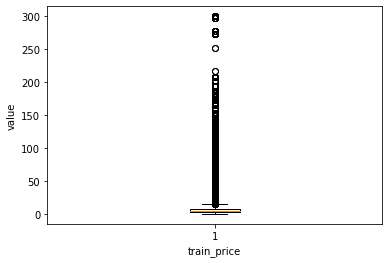

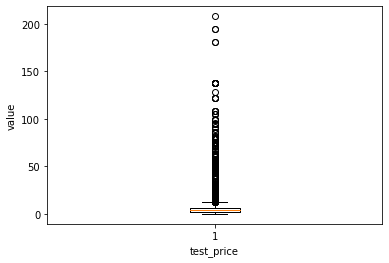

In [8]:
train_price = train['price']
test_price = test['price']

plt.xlabel("train_price")
plt.ylabel("value")
plt.boxplot(train_price,sym="o",whis=1.5)
plt.show()

plt.xlabel("test_price")
plt.ylabel("value")
plt.boxplot(test_price,sym="o",whis=1.5)
plt.show()

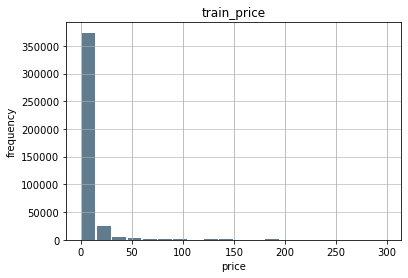

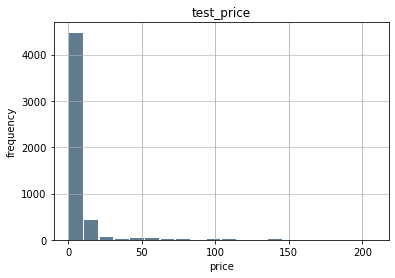

In [9]:
size, scale = 1000, 10
train_price.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('train_price')
plt.xlabel('price')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

size, scale = 1000, 10
test_price.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('test_price')
plt.xlabel('price')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [10]:
print('train_price:')
print(train_price.describe())
print()
print('test_price:')
print(test_price.describe())

train_price:
count    416960.000000
mean          8.290777
std          17.846924
min           0.000000
25%           2.370000
50%           4.110000
75%           7.270000
max         299.810000
Name: price, dtype: float64

test_price:
count    5164.000000
mean        7.135132
std        14.216354
min         0.000000
25%         2.050000
50%         3.800000
75%         6.270000
max       207.940000
Name: price, dtype: float64


In [11]:
train.loc[(train['price']>=0)&(train['price']<2),'price'] = 1
train.loc[(train['price']>=2)&(train['price']<3.5),'price'] = 2
train.loc[(train['price']>=3.5)&(train['price']<5.5),'price'] = 3
train.loc[(train['price']>=5.5)&(train['price']<10),'price'] = 4
train.loc[train['price']>=10,'price'] = 5

In [12]:
test.loc[(test['price']>=0)&(test['price']<2),'price'] = 1
test.loc[(test['price']>=2)&(test['price']<3.5),'price'] = 2
test.loc[(test['price']>=3.5)&(test['price']<5.5),'price'] = 3
test.loc[(test['price']>=5.5)&(test['price']<10),'price'] = 4
test.loc[test['price']>=10,'price'] = 5

In [13]:
train['price'] = train['price'].astype('object')
print(train['price'].dtype)
print(train['price'].describe())
print()

test['price'] = test['price'].astype('object')
print(test['price'].dtype)
print(test['price'].describe())

object
count     416960.0
unique         5.0
top            1.0
freq       89337.0
Name: price, dtype: float64

object
count     5164.0
unique       5.0
top          2.0
freq      1294.0
Name: price, dtype: float64


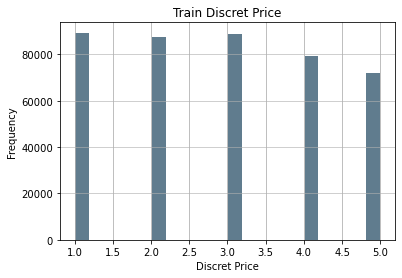

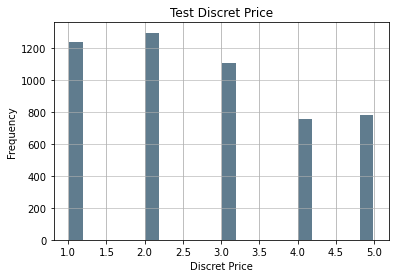

In [14]:
size, scale = 1000, 10
train['price'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Train Discret Price')
plt.xlabel('Discret Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

size, scale = 1000, 10
test['price'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Test Discret Price')
plt.xlabel('Discret Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [15]:
train_brand = train['brand']
test_brand = test['brand']
print(train_brand.describe())
print()
print(test_brand.describe())
print()

train_brand = train_brand.drop_duplicates()
test_brand = test_brand.drop_duplicates()

count     416960
unique       223
top         null
freq      164942
Name: brand, dtype: object

count     5164
unique     126
top       null
freq      2076
Name: brand, dtype: object



In [16]:
count = 0
for i in test_brand:
    if (i in train_brand.values):
        continue
    else:
        count = count + 1
print(count)

0


In [17]:
train_product = train['product_id']
test_product = test['product_id']
print(train_product.describe())
print()
print(test_product.describe())
print()

train_product = train_product.drop_duplicates()
test_product = test_product.drop_duplicates()

count      416960
unique      32732
top       5892179
freq         1063
Name: product_id, dtype: int64

count        5164
unique       2691
top       5700037
freq           28
Name: product_id, dtype: int64



In [18]:
count = 0
for i in test_product:
    if (i in train_product.values):
        continue
    else:
        count = count + 1
print(count)

50


In [19]:
print(test['user_id'].describe())

count      5164
unique      558
top       54193
freq        141
Name: user_id, dtype: int64


In [20]:
train_user = train['user_id']
test_user = test['user_id']

train_user = train_user.drop_duplicates()
test_user = test_user.drop_duplicates()

purchase = train[(train['event_type'] == 'purchase')]
for i in train_user:
    purchase_user = purchase[(purchase['user_id'] == i)]
    if purchase_user.empty:
        train = train.drop(index=(train.loc[(train['user_id']==i)].index))

purchase = test[(test['event_type'] == 'purchase')]
for i in test_user:
    purchase_user = purchase[(purchase['user_id'] == i)]
    if purchase_user.empty:
        test = test.drop(index=(test.loc[(test['user_id']==i)].index))

In [21]:
print(test['user_id'].describe())

count      1300
unique       49
top       54284
freq        139
Name: user_id, dtype: int64


In [22]:
test_user = test['user_id']
test_user = test_user.drop_duplicates()

test_clear = pd.DataFrame(columns=('event_time','event_type','product_id','category_id','category_code','brand','price','user_id','user_session'))

for i in test_user:
    flag = 0
    user_event = test[(test['user_id'] == i)]
    for indexs in user_event.index:
        if (flag == 0)&(user_event.loc[indexs]['event_type'] != 'purchase'):
            test_clear = test_clear.append(user_event.loc[indexs])
        if (flag == 1)&(user_event.loc[indexs]['event_type'] != 'purchase'):
            break
        if user_event.loc[indexs]['event_type'] == 'purchase':
            flag = 1
            test_clear = test_clear.append(user_event.loc[indexs])

In [23]:
train_user = train['user_id']
train_user = train_user.drop_duplicates()

train_clear = pd.DataFrame(columns=('event_time','event_type','product_id','category_id','category_code','brand','price','user_id','user_session'))

for i in train_user:
    flag = 0
    user_event = train[(train['user_id'] == i)]
    for indexs in user_event.index:
        if (flag == 0)&(user_event.loc[indexs]['event_type'] != 'purchase'):
            train_clear = train_clear.append(user_event.loc[indexs])
        if (flag == 1)&(user_event.loc[indexs]['event_type'] != 'purchase'):
            break
        if user_event.loc[indexs]['event_type'] == 'purchase':
            flag = 1
            train_clear = train_clear.append(user_event.loc[indexs])

In [24]:
train_clear.to_csv('train_clear.csv')
test_clear.to_csv('test_clear.csv')

### 分析结果
1.训练集与测试集的覆盖程度

价格属性，训练集整体大于测试集1，影响不大。

品牌属性，测试集中的品牌全部都出现在训练集中。

产品属性，测试集中只有50个产品并未出现在训练集中。

2.价格离散化

根据信息论，当分布趋近于均匀分布时，熵最大。

选择0-2置1，2-3.5置2，3.5-5.5置3，5.5-10置4，>10置5的策略，

使得离散后的分布趋近于均匀分布。

3.测试集中共有558名用户，其中有购买行为的用户仅有49名。